In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
155801,0.0,0.030769,1.0,0.538462,0.0,0.0,1.0,0.094463,0.932099,0.051903,1
198194,1.0,0.046154,1.0,0.615385,0.0,0.0,0.0,0.031527,0.932099,0.290657,0
146352,0.0,0.061538,1.0,0.153846,1.0,0.0,0.0,0.052034,0.932099,0.480969,0
217707,1.0,0.246154,1.0,0.250000,0.0,1.0,0.0,0.021656,0.154321,0.162630,0
153648,0.0,0.046154,1.0,0.576923,0.0,0.0,0.0,0.000000,0.962963,0.044983,1


In [75]:
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
13739,1,0.076923,1,0.961538,1,0,0,0.044870,0.932099,0.550173,0
18255,1,0.030769,1,0.500000,0,0,1,0.076570,0.932099,0.622837,1
31003,1,0.246154,1,0.576923,1,1,0,0.066950,0.932099,0.256055,0
37118,0,0.092308,1,0.788462,1,0,0,0.049614,0.932099,0.688581,0
5949,1,0.723077,1,0.538462,1,1,0,0.040678,0.154321,0.570934,0


0    250661
1     35001
Name: Tertarik, dtype: int64


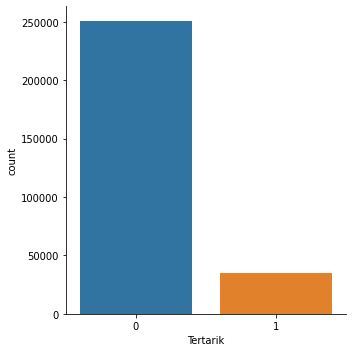

In [76]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [77]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [78]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42, k_neighbors=5)
x_data, y_data = smt.fit_sample(x_data, y_data)

In [79]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_val.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_val.shape}')


x_train shape: (401057, 10)
x_test shape: (100265, 10)
---------------------------------
y_train shape: (401057,)
y_test shape: (100265,)


## **Tuning Model**

In [80]:
classifier = [
    DecisionTreeClassifier(class_weight='balanced'),
    SGDClassifier(class_weight='balanced'),
    GaussianNB(),
    AdaBoostClassifier(),
    RandomForestClassifier(class_weight='balanced'),
]

name = [
    'Decision Tree',
    'SGDClassifier',
    'Naive Bayes',
    'AdaBoost',
    'Random Forest',
]

### **Melatih Model Machine Learning**

In [81]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)

In [82]:
def report(model, title, x_test, y_test):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    f1 = f1_score(y_test, result)
    recall = recall_score(y_test, result)
    precision = precision_score(y_test, result)
    roc = roc_auc_score(y_test, result)
    accuracy = accuracy_score(y_test, result)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy

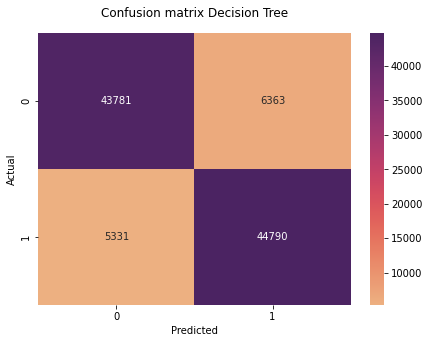

F1-Score 	: 0.8845310741157651
Recall 		: 0.8936373974980547
Precision 	: 0.8756084687115125
ROC-AUC 	: 0.8833714268919757
Accuracy 	: 0.8833690719593078



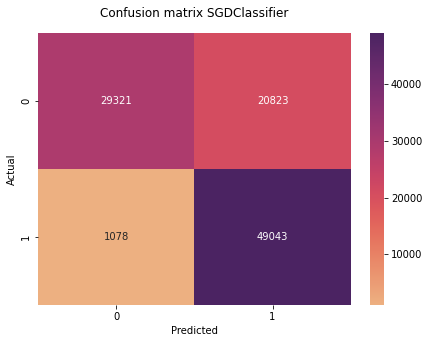

F1-Score 	: 0.8174718927883854
Recall 		: 0.9784920492408372
Precision 	: 0.7019580339507057
ROC-AUC 	: 0.7816140048373937
Accuracy 	: 0.7815688425671969



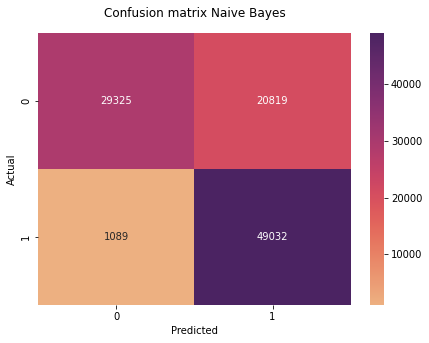

F1-Score 	: 0.8173907245023838
Recall 		: 0.9782725803555395
Precision 	: 0.7019512963307611
ROC-AUC 	: 0.7815441555255681
Accuracy 	: 0.7814990275769211



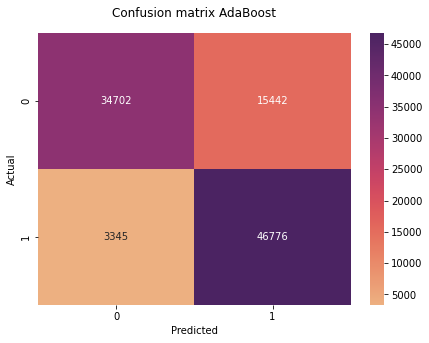

F1-Score 	: 0.83276511273912
Recall 		: 0.9332615071526905
Precision 	: 0.7518081584107493
ROC-AUC 	: 0.8126542060332693
Accuracy 	: 0.8126265396698749



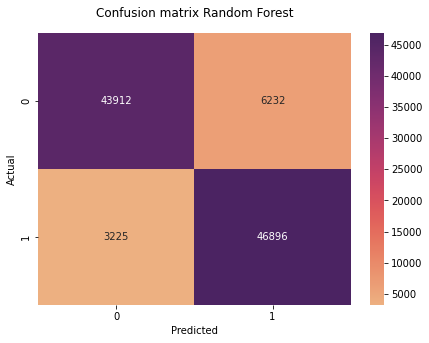

F1-Score 	: 0.9084058925510174
Recall 		: 0.9356557131741187
Precision 	: 0.8826983887968679
ROC-AUC 	: 0.9056868227644683
Accuracy 	: 0.9056799481374358



In [83]:
metrics_report = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_val, y_val)
    metrics_report.append([title, f1, recall, precision, roc, accuracy])

In [84]:
metrics_report = pd.DataFrame(metrics_report, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
4,Random Forest,0.908406,0.935656,0.882698,0.905687,0.905680
0,Decision Tree,0.884531,0.893637,0.875608,0.883371,0.883369
3,AdaBoost,0.832765,0.933262,0.751808,0.812654,0.812627
1,SGDClassifier,0.817472,0.978492,0.701958,0.781614,0.781569
2,Naive Bayes,0.817391,0.978273,0.701951,0.781544,0.781499


## **Memprediksi Dan Evaluasi Data Test**

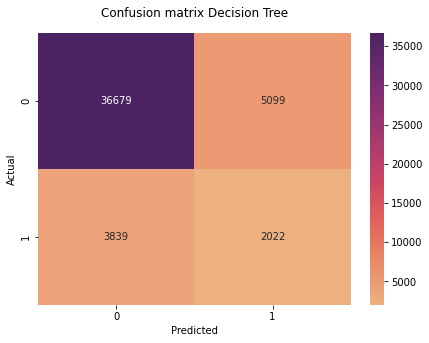

F1-Score 	: 0.31150824218148204
Recall 		: 0.34499232212932945
Precision 	: 0.2839488835837663
ROC-AUC 	: 0.6114712197079698
Accuracy 	: 0.8123806125233527



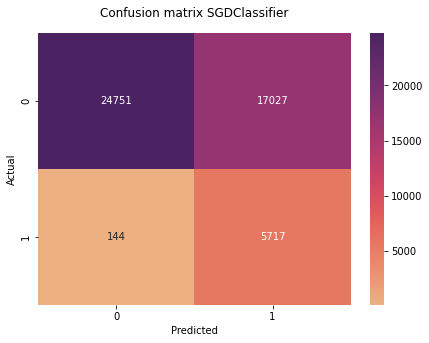

F1-Score 	: 0.39972032861387874
Recall 		: 0.9754308138542911
Precision 	: 0.25136299683432994
ROC-AUC 	: 0.7839359057542793
Accuracy 	: 0.6395600243497974



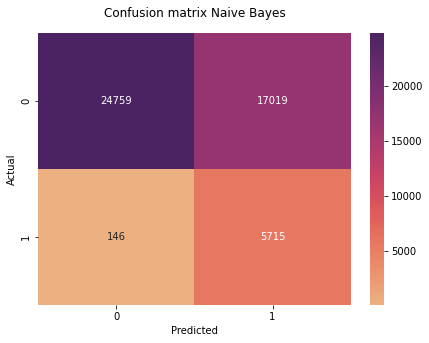

F1-Score 	: 0.399720230809582
Recall 		: 0.9750895751578229
Precision 	: 0.25138558986539983
ROC-AUC 	: 0.7838610305776189
Accuracy 	: 0.6396859715779089



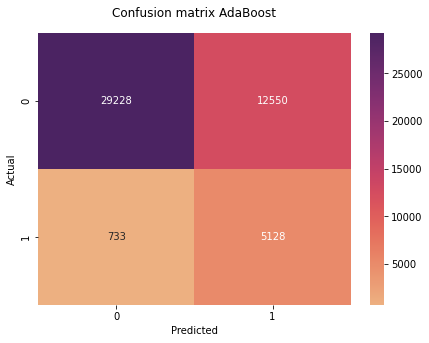

F1-Score 	: 0.4357024512511152
Recall 		: 0.8749360177444122
Precision 	: 0.2900780631293133
ROC-AUC 	: 0.787269339716191
Accuracy 	: 0.7211738281659984



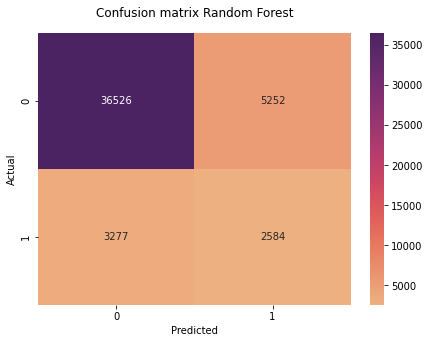

F1-Score 	: 0.37730889975907134
Recall 		: 0.44088039583688793
Precision 	: 0.32976008167432364
ROC-AUC 	: 0.6575841492804048
Accuracy 	: 0.8209660152396147



In [85]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

metrics_report_test = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_test, y_test)
    metrics_report_test.append([title, f1, recall, precision, roc, accuracy])

In [86]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
3,AdaBoost,0.435702,0.874936,0.290078,0.787269,0.721174
1,SGDClassifier,0.399720,0.975431,0.251363,0.783936,0.639560
2,Naive Bayes,0.399720,0.975090,0.251386,0.783861,0.639686
4,Random Forest,0.377309,0.440880,0.329760,0.657584,0.820966
0,Decision Tree,0.311508,0.344992,0.283949,0.611471,0.812381
